# Networks are like onions
o	Why do we need different types of layers?  
o	What are good network designs for image data  
o	What is a convolutional layer?  
o	How can we avoid overfitting?  
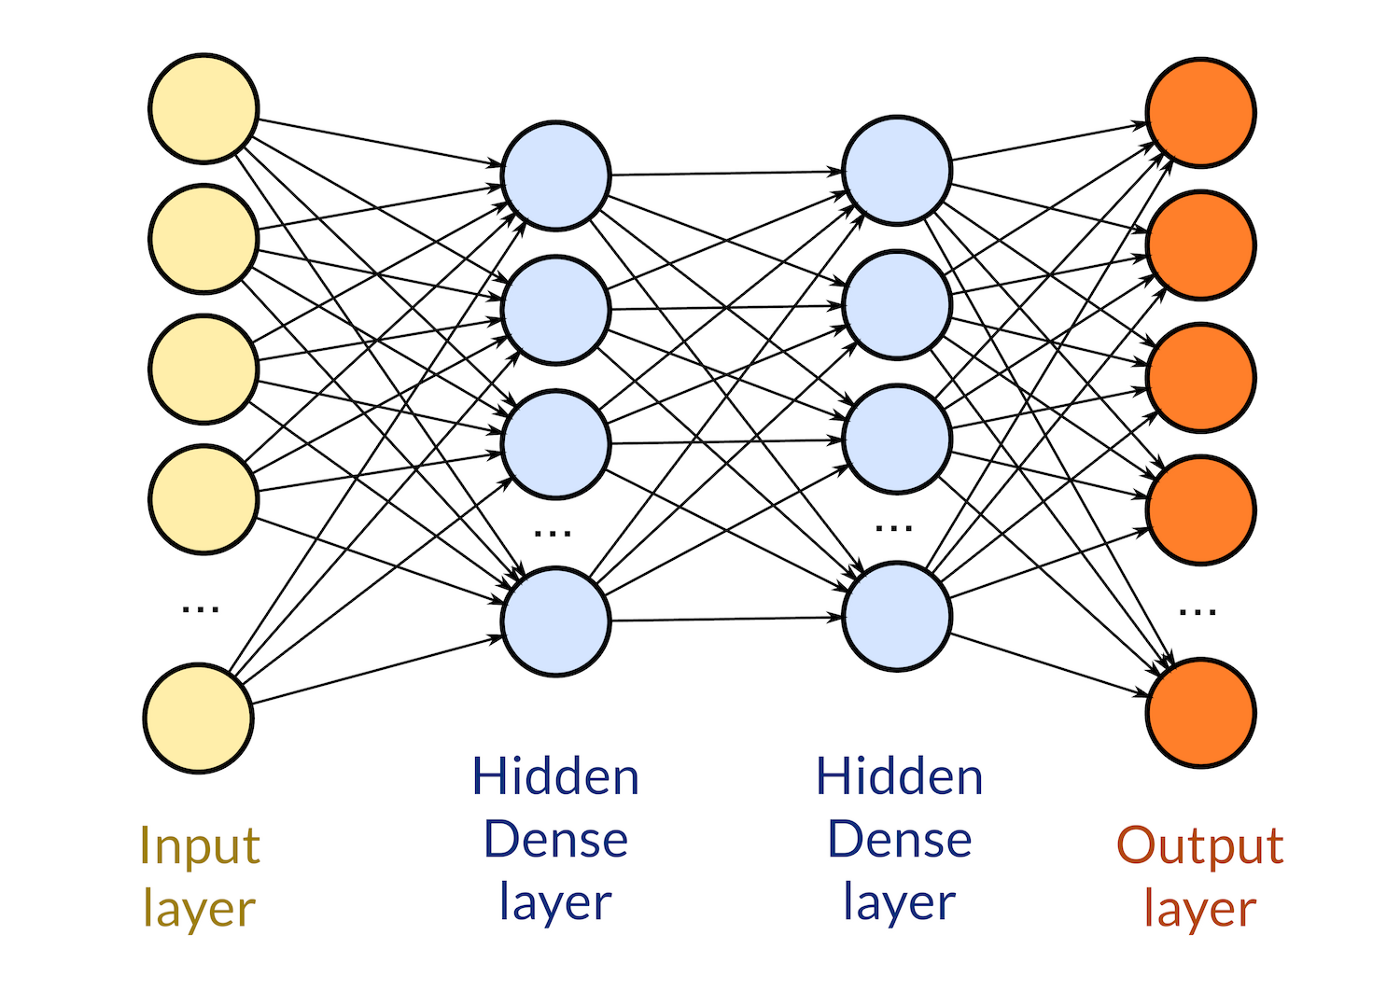

In [2]:
from tensorflow import keras
(train_images, train_labels), (test_images, test_labels) = \
    keras.datasets.cifar10.load_data()

In [3]:
len(train_images)

50000

In [4]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

## Step 0: inspect the data

In [8]:
# What is the dimension of a single datapoint? 
# What do you think the dimensions mean?
train_images.shape

(5000, 32, 32, 3)

In [9]:
# What is the range of values that your input data takes?
train_images.min(), train_images.max()

(0, 255)

In [7]:
# What is the shape of the labels, and how many labels do we have?

In [10]:
train_labels.shape

(5000, 1)

In [11]:
train_labels.min(), train_labels.max()

(0, 9)

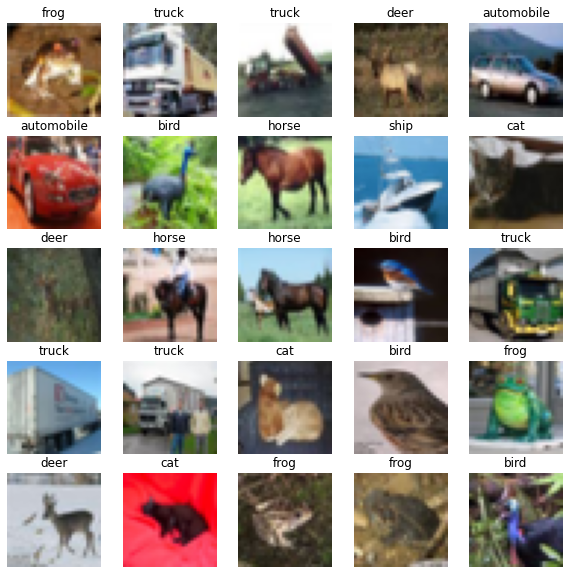

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[train_labels[i,0]])
plt.show()

## 1: Formulate the problem
Classify images, predict given an image which class is it out of the 10 available classes

## 2. Inputs and outputs
Inputs: Images Output: the class

## 3. Prepare data

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
train_images.min(), train_images.max()

(0.0, 1.0)

## 4. Choose a pretrained model or build a new architecture from scratch
Normally we would choose a State of the Art model that is light enough train on our own infrastructure. For now we will build from scratch.

In [15]:
train_images.shape

(5000, 32, 32, 3)

In [16]:
dim = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]
dim

3072

Suppose we create a single Dense (fully connected) layer with 100 hidden units that connect to the input pixels, how many parameters does this layer have?

In [18]:
3072 * 100 + 100

307300

## Convolutional layers
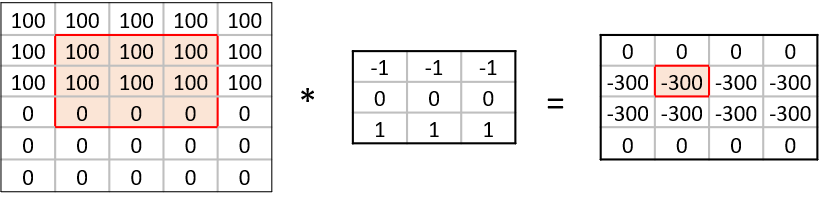
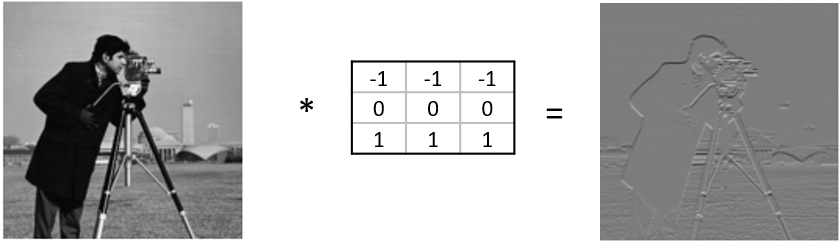

In [19]:
# What, do you think, happens to the border pixels when applying a convolution?

In [20]:
# Suppose we apply a convolutional layer with 100 kernels of size 3 * 3 * 3 
# (the last dimension applies to the rgb channels) to our images 
# of 32 * 32 * 3 pixels. How many parameters do we have? 
# Assume, for simplicity, that the kernels do not use bias terms. 
# Compare this to the answer of the previous exercise

100 matrices with 3 * 3 * 3 = 27 values each. 27 * 100 = 2700 weights

In [24]:
train_images.shape

(5000, 32, 32, 3)

In [23]:
train_images.shape[1:]

(32, 32, 3)

In [21]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 261,034
Trainable params: 261,034
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Inspect the network above:

# What do you think is the function of the Flatten layer?
# Which layer has the most parameters? Do you find this intuitive?

## Pooling layer

In [25]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)        

# 5. Choose a loss function and optimizer

In [26]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## 6. Training the model

In [28]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 2.0737 - accuracy: 0.2360WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fc1b6aae950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

<AxesSubplot:>

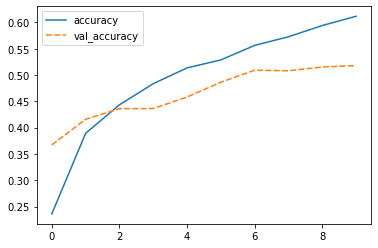

In [31]:
import seaborn as sns
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

<AxesSubplot:>

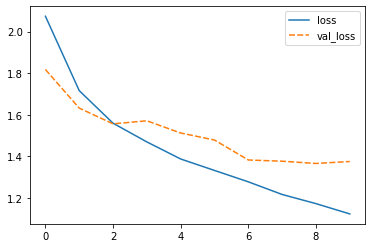

In [32]:
sns.lineplot(data=history_df[['loss', 'val_loss']])

## Network depth exercise
What, do you think, will be the effect of adding a convolutional layer to your model? Will this model have more or fewer parameters? Try it out. Create a model that has an additional Conv2d layer with 32 filters after the last MaxPooling2D layer. Train it for 20 epochs and plot the results.

In [34]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_extra_layer")

In [35]:
model.summary()

Model: "cifar_model_extra_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 3

## Dropout layer
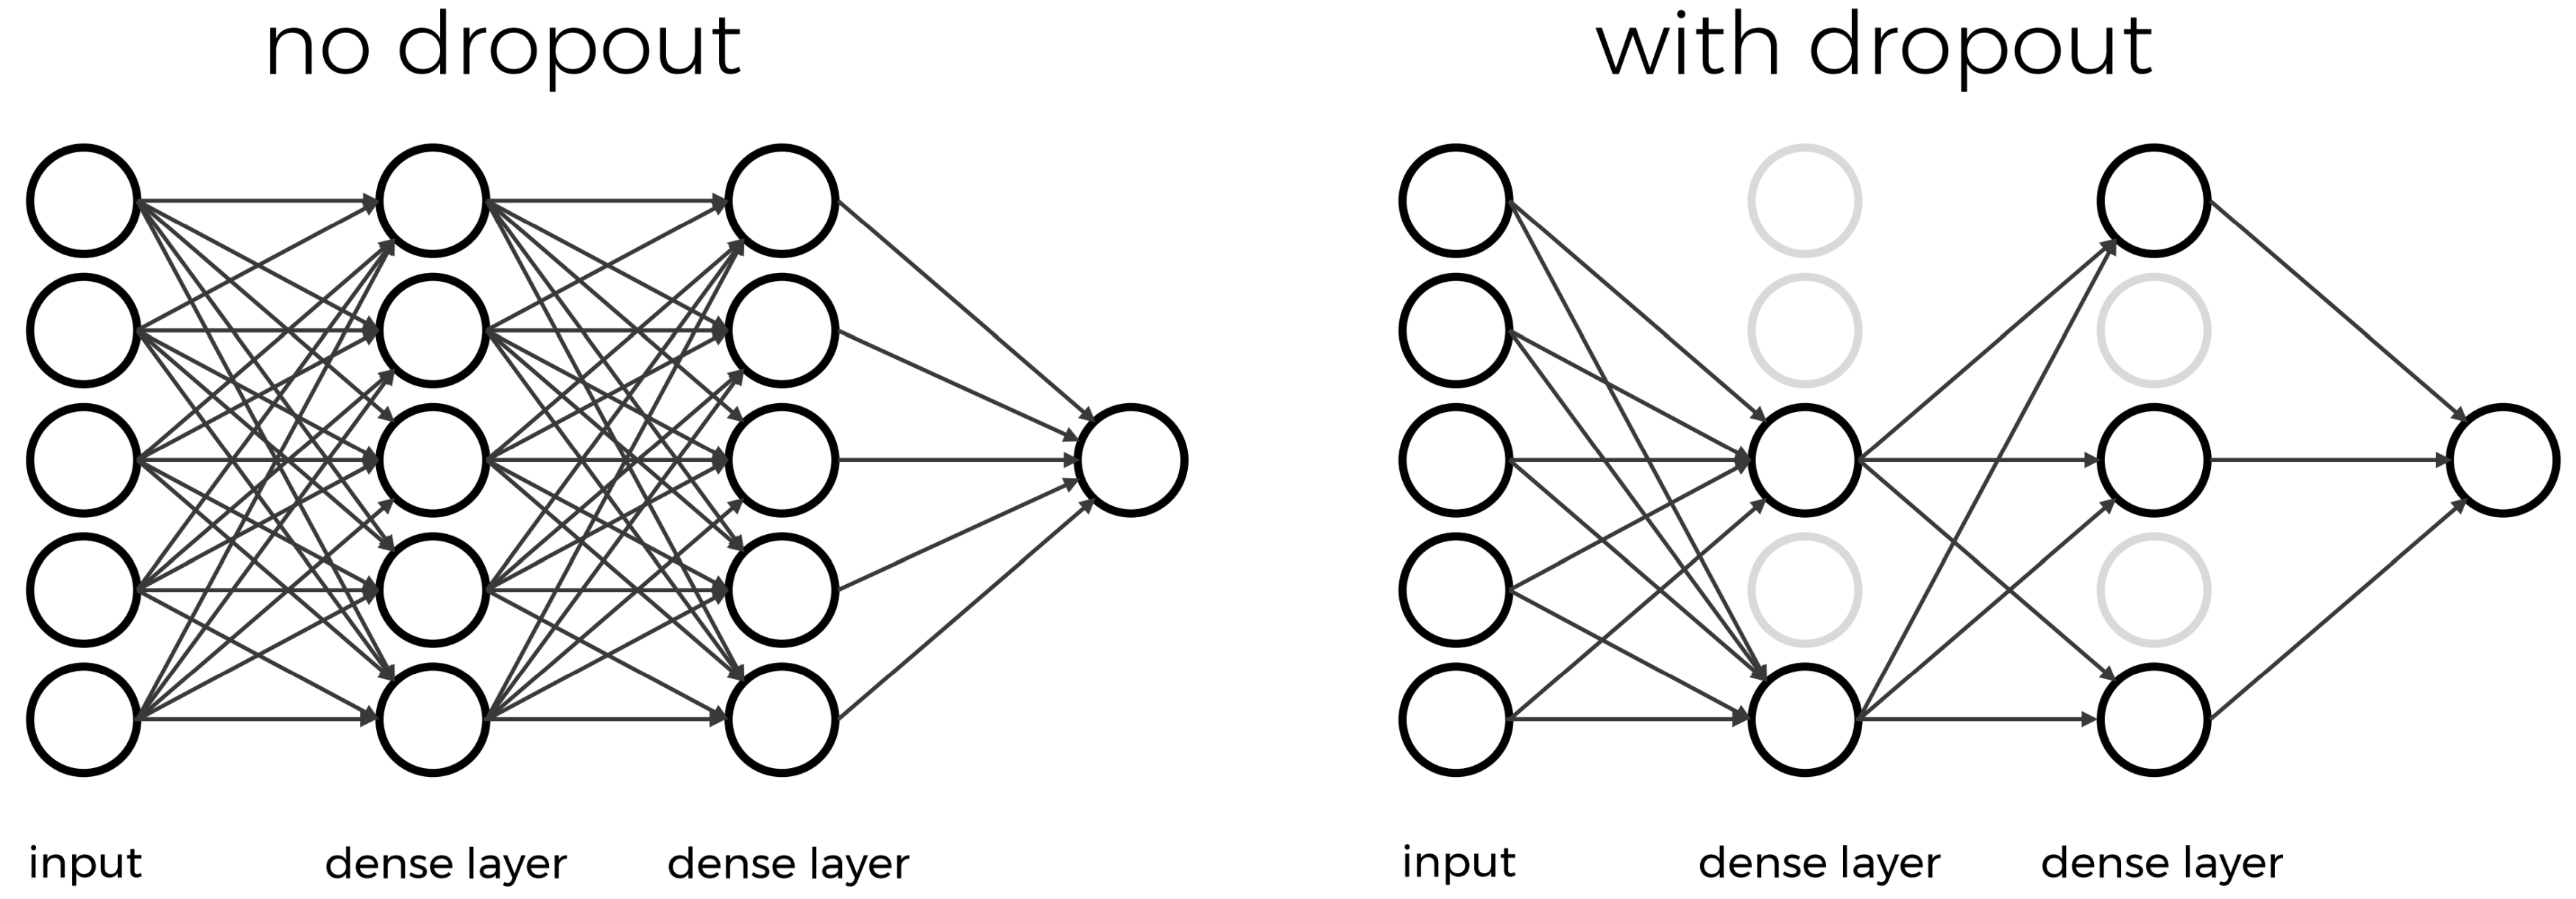

### Hyperparameter tuning intuition:

In [ ]:
number_of_layers = [2, 3, 4]
number_of_nodes = [100, 200]
dropout_proportion = [0.2, 0.5, 0.8]

In [37]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
# Add dropout layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
# Added dense
x = keras.layers.Dense(32, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_with_dropout")

In [39]:
model.summary()

Model: "cifar_model_with_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 

In [40]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
history = model.fit(train_images, train_labels,
                    epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
156/157 [============================>.] - ETA: 0s - loss: 2.1372 - accuracy: 0.1921WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fc1ac9214d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

<AxesSubplot:>

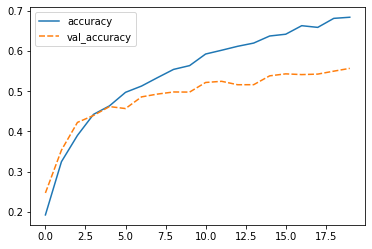

In [42]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

<AxesSubplot:>

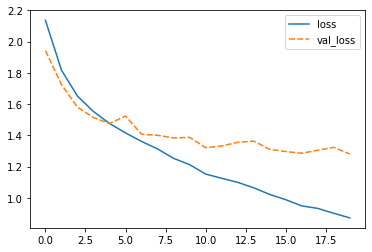

In [43]:
sns.lineplot(data=history_df[['loss', 'val_loss']])